# Deceptive 4 & MAXONE

In [257]:
%load_ext autoreload
%autoreload 2

import numpy as np
from numpy import genfromtxt
from trueskill import TrueSkill, Rating, quality_1vs1, rate_1vs1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib import cm
from scipy import stats
import operator as op
import pandas as pd
from ast import literal_eval
from mpl_toolkits.mplot3d import Axes3D
import math
import sys

import mygabasic as ga
 
%aimport mygabasic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [258]:
def deceptive(binString, inv = True):
    ln = len(binString)
    nz = np.count_nonzero(binString)
    if inv == True:
        if nz == 0:
            return 0
        else:
            return (ln + 1) - nz
    else:
        if nz == 0:
            return 0
        else:
            return nz
    
    

In [259]:
def maxOne(binString, inv = True):
    ln = len(binString)
    nz = np.count_nonzero(binString)
    if inv == True:
        return (1 - (nz/ln))
    else:   
        return (nz/ln)


In [110]:
Pop = ga.pgenerator(N=16,d =100)
print(Pop)
for et in Pop:
    print(maxOne(et))

[[0 1 0 ... 1 1 0]
 [1 0 0 ... 1 1 0]
 [1 0 1 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 [1 1 1 ... 0 0 0]]
0.44999999999999996
0.35
0.44999999999999996
0.47
0.56
0.47
0.51
0.47
0.53
0.5700000000000001
0.51
0.54
0.48
0.63
0.53
0.52


In [44]:
N = 8
matingPercent = 0.7
mutaPercent = 0.02
Pop = ga.pgenerator(N=N,d =4)
print(Pop)
fitList = ga.popfitnes4BinMapping(Pop, funct = deceptive)
print(fitList)
pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
print(pselect)
children = ga.childenGen(pselect, matingPercent = matingPercent, mutaPercent = mutaPercent)
print(children)

[[0 1 0 1]
 [0 0 0 0]
 [0 0 0 1]
 [1 0 1 1]
 [1 1 1 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 1 0]]
[3, 0, 4, 2, 1, 4, 4, 4]
[[0 0 0 0]
 [1 0 1 1]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 1]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [1 0 1 1]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 1]
 [0 0 0 0]
 [0 0 0 0]]


# Deceptive 4

# Deceptive 4 Tournament 

 Iteration 31

Last fit info______
Last fit mean: 0.0
Last fit std: 0.0
Last fit median: 0.0
Last fit min: 0
Last fit max: 0
Last Pop info______
Last Pop mean: [0. 0. 0. 0.]
Last Pop std: [0. 0. 0. 0.]
Last Pop median: [0. 0. 0. 0.]
Last Pop min: [0 0 0 0]
Last Pop max: [0 0 0 0]


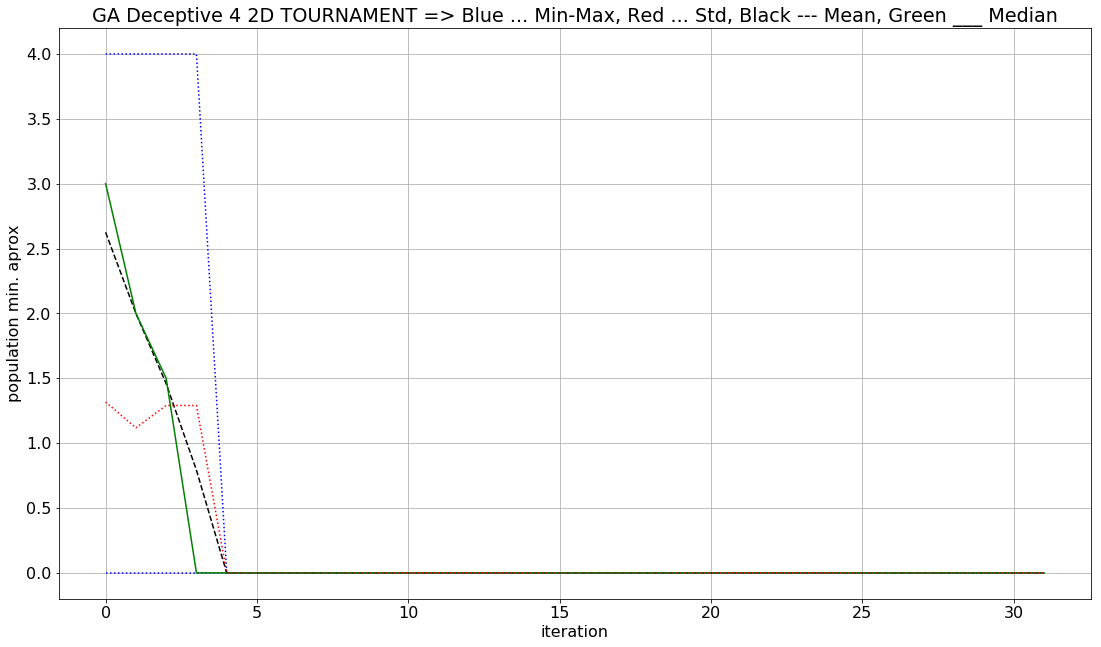

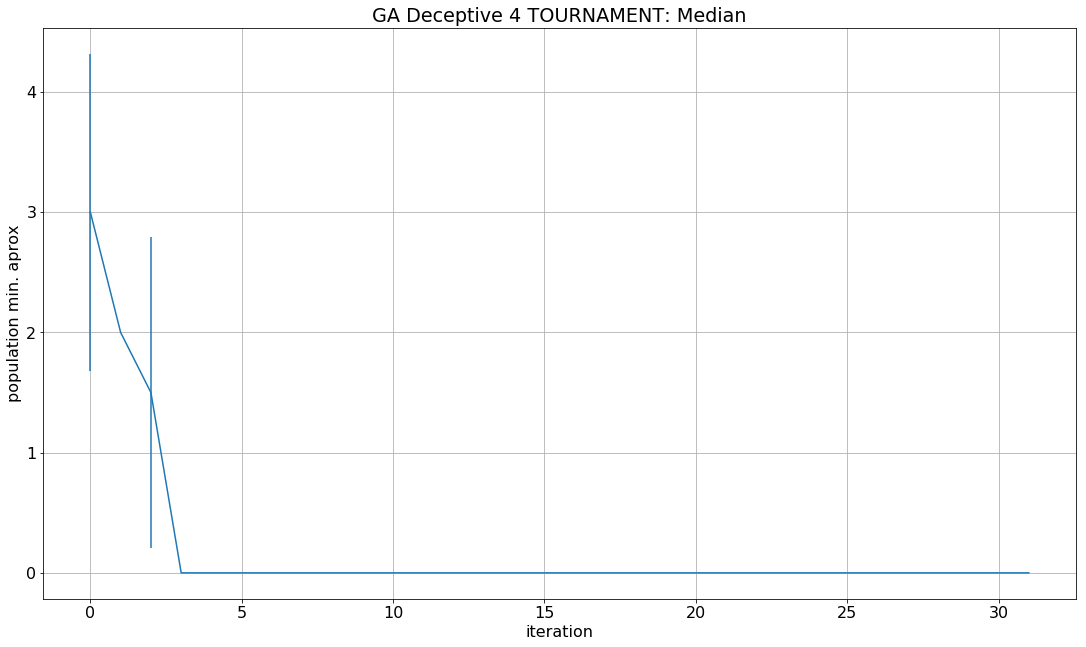

In [133]:
# Generate population
N = 24
d = 4
iterations = 32
matingPercent = 0.5
mutaPercent = 0.00007
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []


for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList = ga.popfitnes4BinMapping(Pop, funct = deceptive)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen(pselect, matingPercent = matingPercent, mutaPercent = mutaPercent)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(Pop, axis=0)))
print('Last Pop std: ' + str(np.std(Pop, axis=0)))
print('Last Pop median: ' + str(np.median(Pop, axis=0)))
print('Last Pop min: ' + str(np.amin(Pop, axis=0)))
print('Last Pop max: ' + str(np.amax(Pop, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Deceptive 4 2D TOURNAMENT => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('Deceptive4TournamentGA_2d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:2] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Deceptive 4 TOURNAMENT: Median")
plt.grid()
plt.savefig('Deceptive4TournamentGAStd_2d.pdf', format='pdf')
plt.show()

# Deceptive 4 Rank Weighting

 Iteration 31

Last fit info______
Last fit mean: 0.0
Last fit std: 0.0
Last fit median: 0.0
Last fit min: 0
Last fit max: 0
Last Pop info______
Last Pop mean: [0. 0. 0. 0.]
Last Pop std: [0. 0. 0. 0.]
Last Pop median: [0. 0. 0. 0.]
Last Pop min: [0 0 0 0]
Last Pop max: [0 0 0 0]


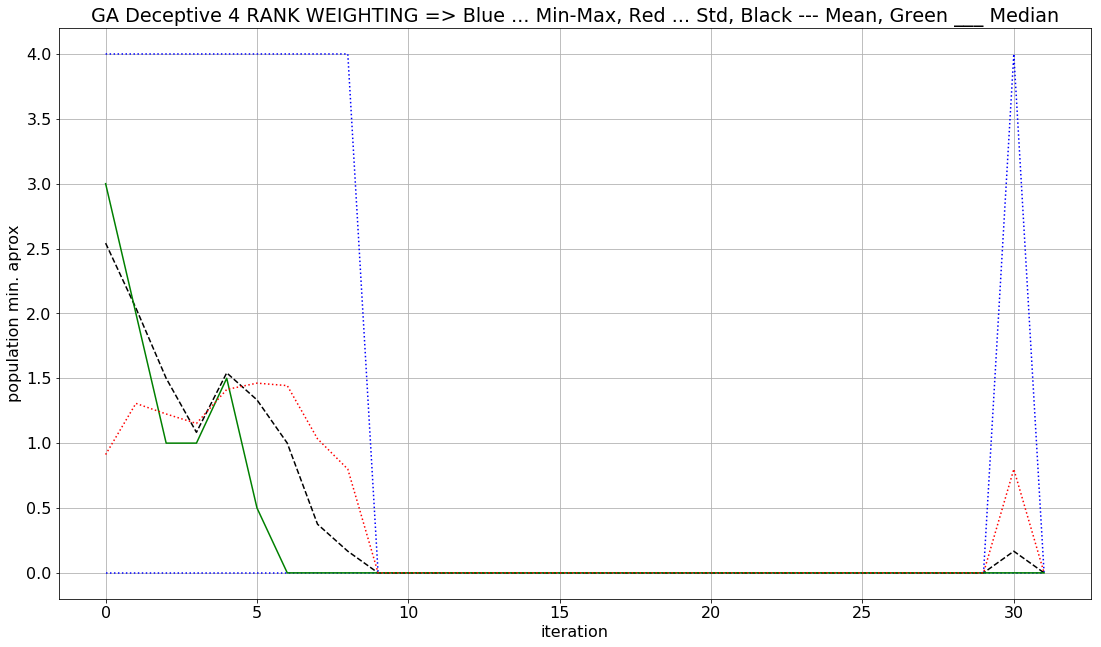

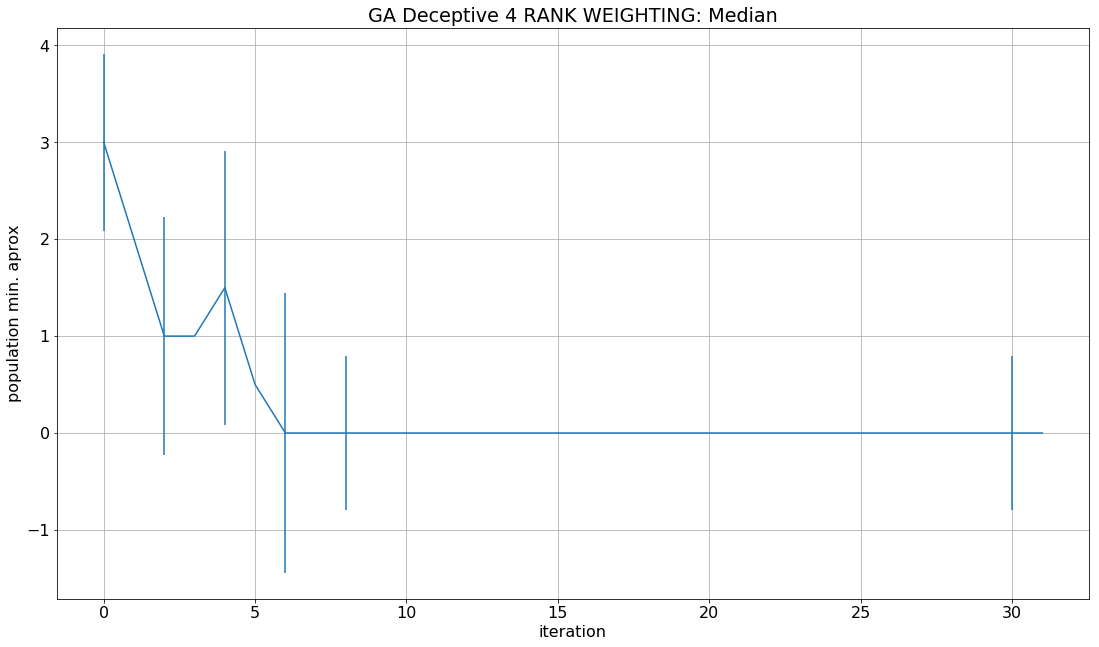

In [279]:
# Generate population
N = 24
d = 4
iterations = 32
matingPercent = 0.6
mutaPercent = 0.00007
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []


for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList = ga.popfitnes4BinMapping(Pop, funct = deceptive)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    ordPop,ordFitVal,ordFitLst,rankWeighting = ga.rankWeighting(fitList,Pop,Pop,keep = 1)
    pselect = ga.weightedSelection(ordPop, rankWeighting, int(N/2))
    
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen(pselect, matingPercent = matingPercent, mutaPercent = mutaPercent)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(Pop, axis=0)))
print('Last Pop std: ' + str(np.std(Pop, axis=0)))
print('Last Pop median: ' + str(np.median(Pop, axis=0)))
print('Last Pop min: ' + str(np.amin(Pop, axis=0)))
print('Last Pop max: ' + str(np.amax(Pop, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Deceptive 4 RANK WEIGHTING => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('Deceptive4RankWeightingGA_2d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:2] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Deceptive 4 RANK WEIGHTING: Median")
plt.grid()
plt.savefig('Deceptive4RankWeightingGAStd_2d.pdf', format='pdf')
plt.show()

# Deceptive 4 Cost Weighting

 Iteration 31

Last fit info______
Last fit mean: 0.0
Last fit std: 0.0
Last fit median: 0.0
Last fit min: 0
Last fit max: 0
Last Pop info______
Last Pop mean: [0. 0. 0. 0.]
Last Pop std: [0. 0. 0. 0.]
Last Pop median: [0. 0. 0. 0.]
Last Pop min: [0 0 0 0]
Last Pop max: [0 0 0 0]


/Users/SerG1oAC/Documents/EvolutiveComputing/notebook/mygabasic.py:71: RuntimeWarning: invalid value encountered in true_divide
  ctW = ctW/smtr


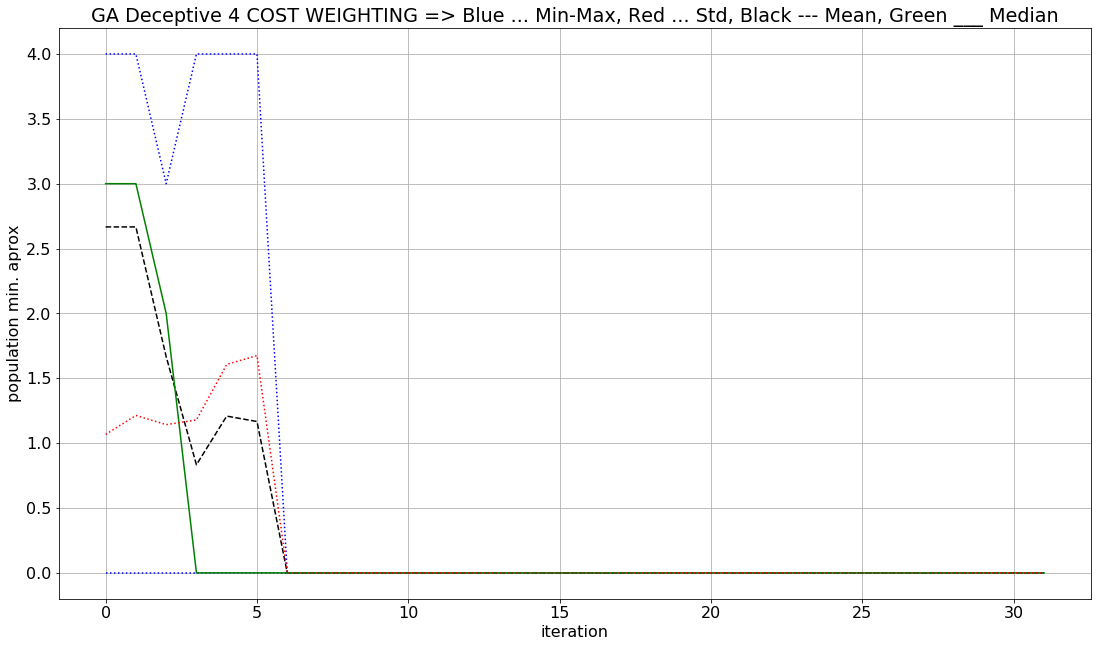

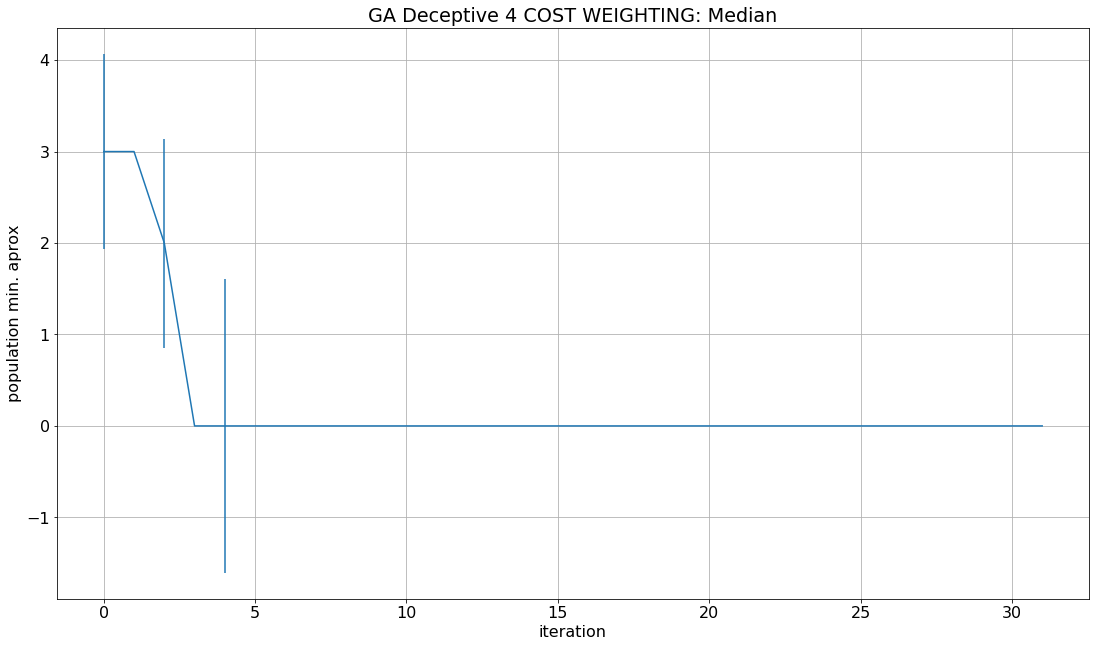

In [273]:
# Generate population
N = 24
d = 4
iterations = 32
matingPercent = 0.8
mutaPercent = 0.00007
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []


for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList = ga.popfitnes4BinMapping(Pop, funct = deceptive)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    
    ordPop,ordFitVal,ordFitLst,costWeighting = ga.costWeighting(fitList,Pop,Pop,keep = 1)
    pselect = ga.weightedSelection(ordPop, costWeighting, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen(pselect, matingPercent = matingPercent, mutaPercent = mutaPercent)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(Pop, axis=0)))
print('Last Pop std: ' + str(np.std(Pop, axis=0)))
print('Last Pop median: ' + str(np.median(Pop, axis=0)))
print('Last Pop min: ' + str(np.amin(Pop, axis=0)))
print('Last Pop max: ' + str(np.amax(Pop, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Deceptive 4 COST WEIGHTING => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('Deceptive4CostWeightingGA_2d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:2] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Deceptive 4 COST WEIGHTING: Median")
plt.grid()
plt.savefig('Deceptive4CostWeightingGAStd_2d.pdf', format='pdf')
plt.show()

# MAXONE Tournament 

 Iteration 299

Last fit info______
Last fit mean: 0.0
Last fit std: 0.0
Last fit median: 0.0
Last fit min: 0.0
Last fit max: 0.0
Last Pop info______
Last Pop mean: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Last Pop std: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Last Pop median: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

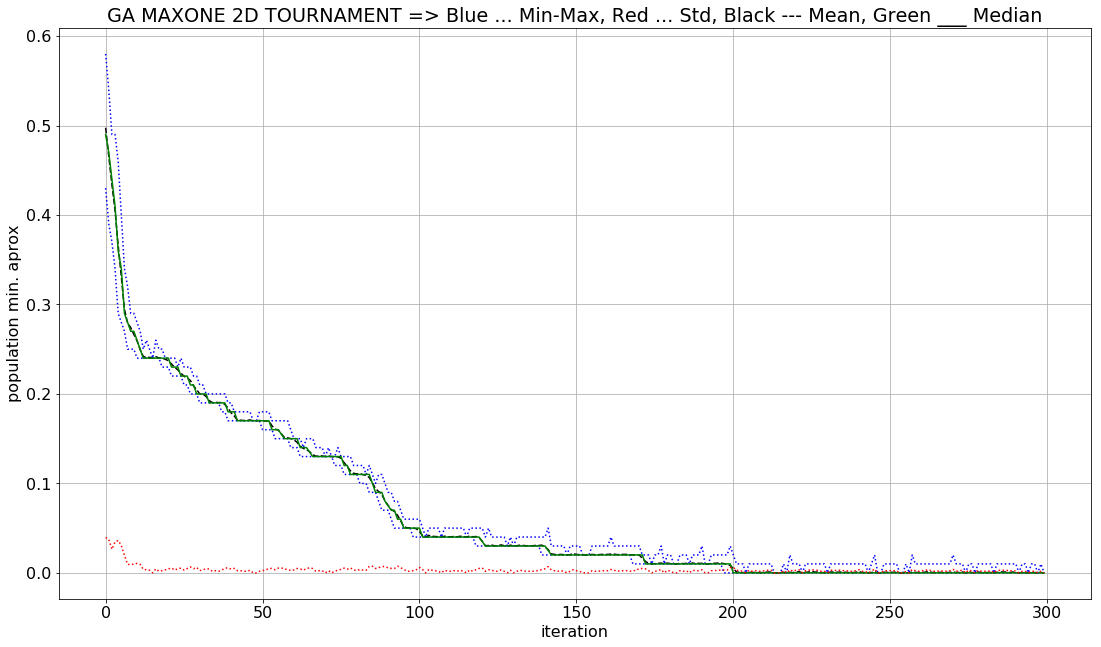

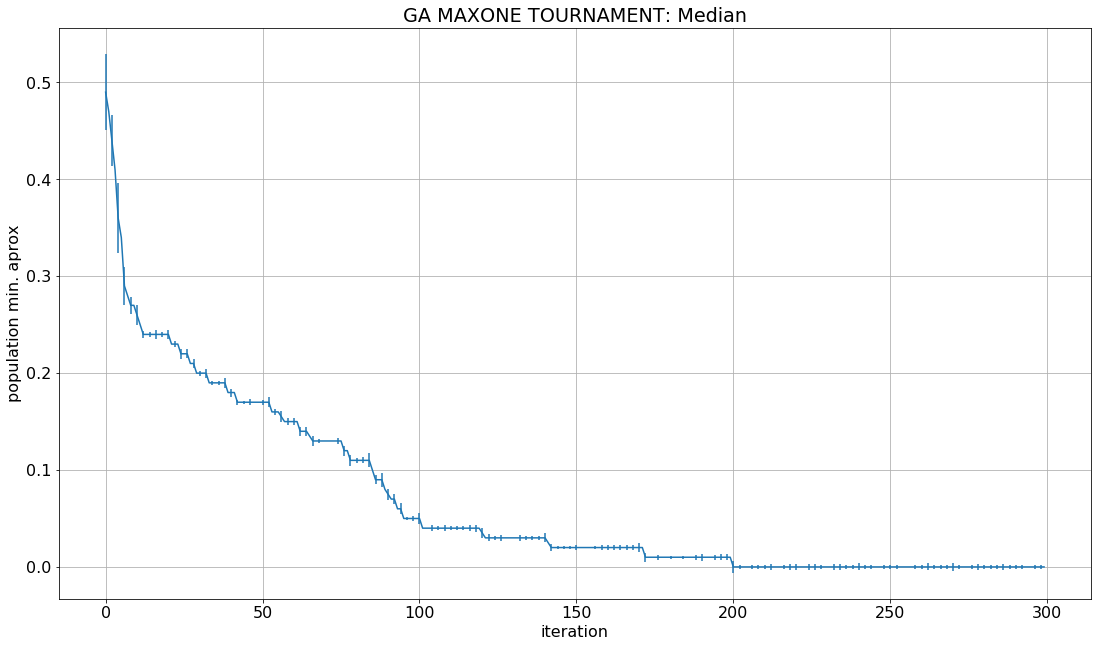

In [285]:
# Generate population
N = 32
d = 100
iterations = 300
matingPercent = 0.8
mutaPercent = 0.0007
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []


for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList = ga.popfitnes4BinMapping(Pop, funct = maxOne)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen(pselect, matingPercent = matingPercent, mutaPercent = mutaPercent)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(Pop, axis=0)))
print('Last Pop std: ' + str(np.std(Pop, axis=0)))
print('Last Pop median: ' + str(np.median(Pop, axis=0)))
print('Last Pop min: ' + str(np.amin(Pop, axis=0)))
print('Last Pop max: ' + str(np.amax(Pop, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA MAXONE 2D TOURNAMENT => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('maxoneTournamentGA_2d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:2] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA MAXONE TOURNAMENT: Median")
plt.grid()
plt.savefig('maxoneTournamentGAStd_2d.pdf', format='pdf')
plt.show()

 Iteration 299

Last fit info______
Last fit mean: 0.0009375000000000008
Last fit std: 0.0029148059540902577
Last fit median: 0.0
Last fit min: 0.0
Last fit max: 0.010000000000000009
Last Pop info______
Last Pop mean: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Last Pop std: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Last Pop median: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

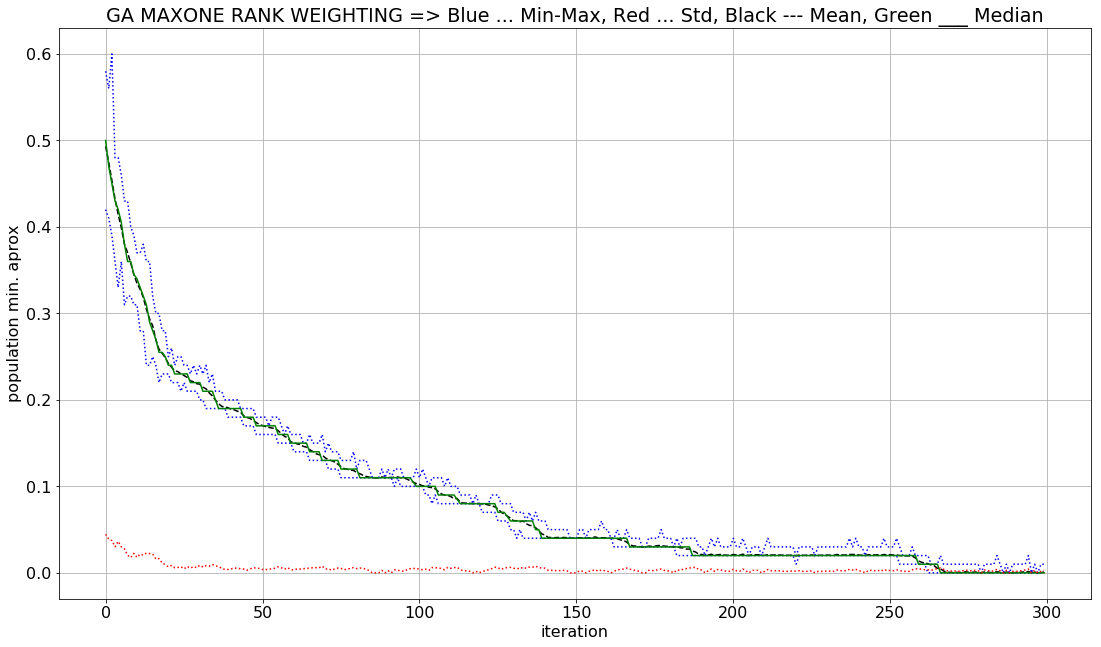

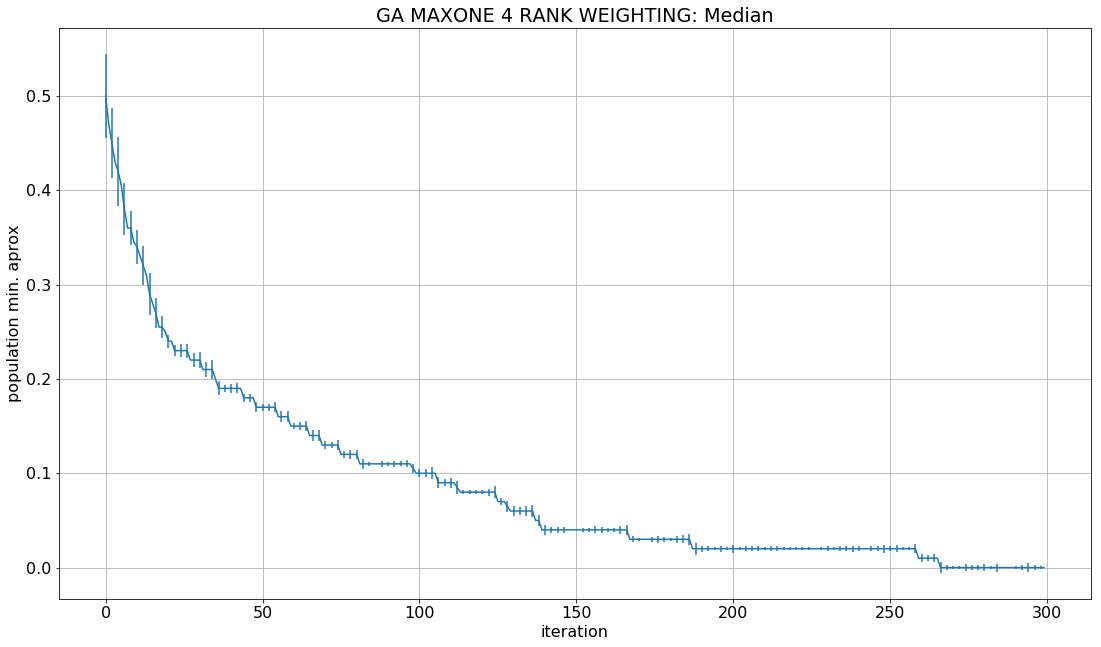

In [286]:
# Generate population
N = 32
d = 100
iterations = 300
matingPercent = 0.8
mutaPercent = 0.0007
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []


for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList = ga.popfitnes4BinMapping(Pop, funct = maxOne)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    ordPop,ordFitVal,ordFitLst,rankWeighting = ga.rankWeighting(fitList,Pop,Pop,keep = 1)
    pselect = ga.weightedSelection(ordPop, rankWeighting, int(N/2))
    
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen(pselect, matingPercent = matingPercent, mutaPercent = mutaPercent)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(Pop, axis=0)))
print('Last Pop std: ' + str(np.std(Pop, axis=0)))
print('Last Pop median: ' + str(np.median(Pop, axis=0)))
print('Last Pop min: ' + str(np.amin(Pop, axis=0)))
print('Last Pop max: ' + str(np.amax(Pop, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA MAXONE RANK WEIGHTING => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('maxoneRankWeightingGA_2d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:2] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA MAXONE 4 RANK WEIGHTING: Median")
plt.grid()
plt.savefig('maxoneRankWeightingGAStd_2d.pdf', format='pdf')
plt.show()

 Iteration 365

/Users/SerG1oAC/Documents/EvolutiveComputing/notebook/mygabasic.py:71: RuntimeWarning: invalid value encountered in true_divide
  ctW = ctW/smtr


 Iteration 499

Last fit info______
Last fit mean: 0.0009375000000000008
Last fit std: 0.0029148059540902572
Last fit median: 0.0
Last fit min: 0.0
Last fit max: 0.010000000000000009
Last Pop info______
Last Pop mean: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Last Pop std: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Last Pop median: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

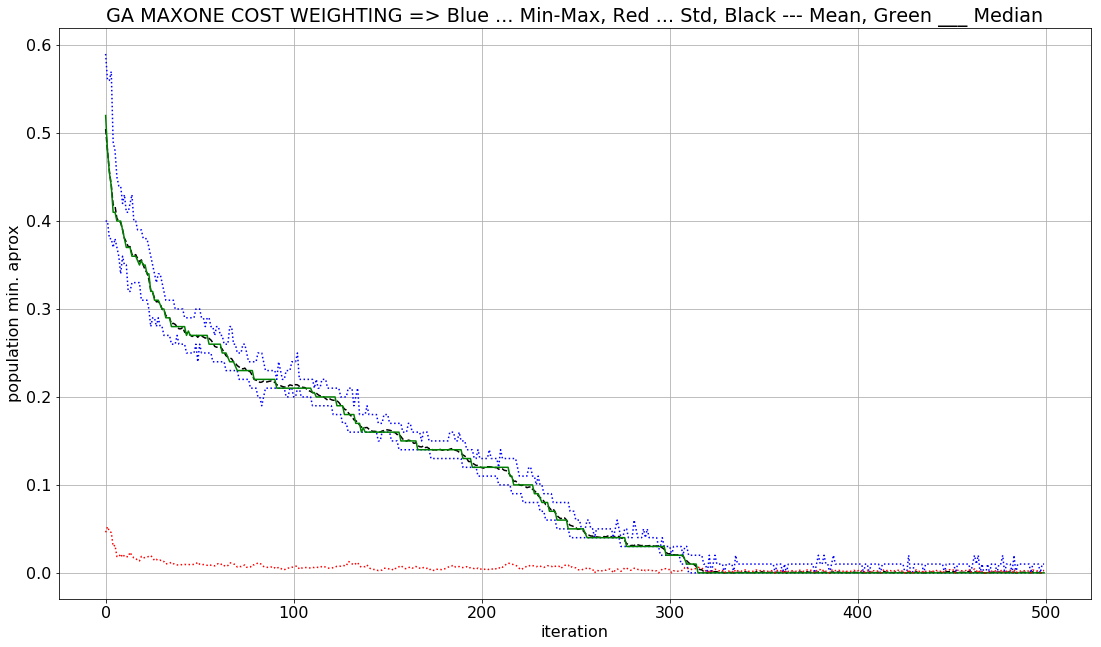

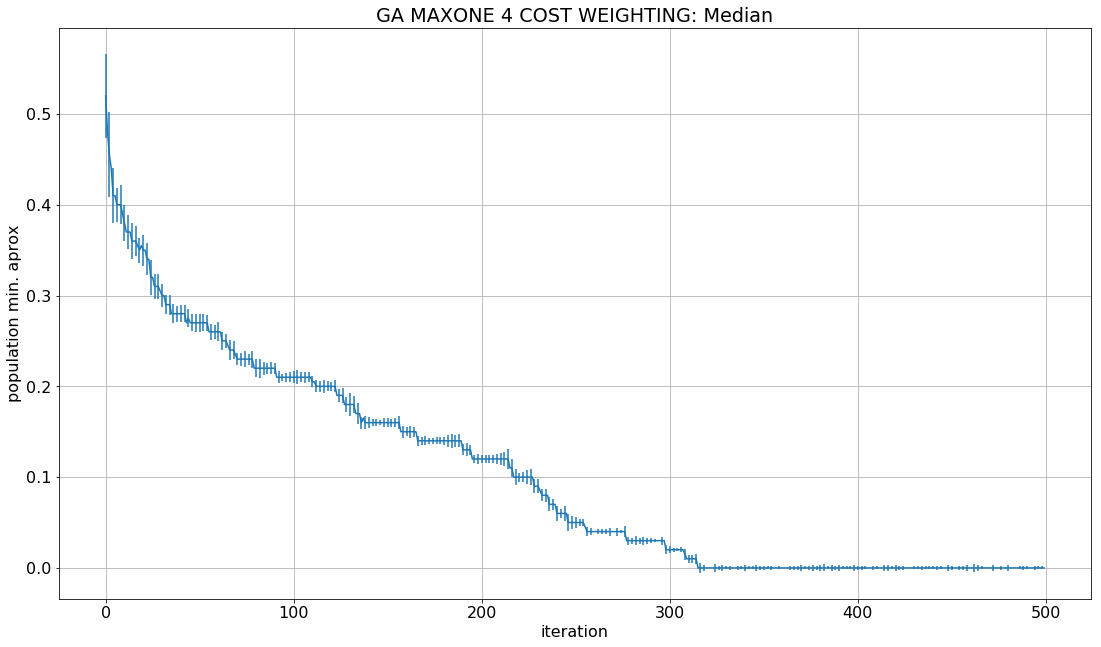

In [278]:
# Generate population
N = 32
d = 100
iterations = 500
matingPercent = 0.8
mutaPercent = 0.0007
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []


for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList = ga.popfitnes4BinMapping(Pop, funct = maxOne)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    ordPop,ordFitVal,ordFitLst,costWeighting = ga.costWeighting(fitList,Pop,Pop,keep = 1)
    pselect = ga.weightedSelection(ordPop, costWeighting, int(N/2))
    
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen(pselect, matingPercent = matingPercent, mutaPercent = mutaPercent)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(Pop, axis=0)))
print('Last Pop std: ' + str(np.std(Pop, axis=0)))
print('Last Pop median: ' + str(np.median(Pop, axis=0)))
print('Last Pop min: ' + str(np.amin(Pop, axis=0)))
print('Last Pop max: ' + str(np.amax(Pop, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA MAXONE COST WEIGHTING => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('maxoneCostWeightingGA_2d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:2] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA MAXONE 4 COST WEIGHTING: Median")
plt.grid()
plt.savefig('maxoneCostWeightingGAStd_2d.pdf', format='pdf')
plt.show()